# Matplotib (Data Visualization)
Matplotlib is a Python 2D library that can produce high-quality plots in a variety of formats and can be used on multiple platforms. Matplotlib can be used as a graph generator on various platforms, such as Python and Jupyter. The graphs that can be made are various, such as line graphs, bars, circles, histograms, etc.

### Import Libraly

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

### Load Dataset

In [5]:
df = pd.read_csv('happiness_rank.csv - happiness_rank.csv.csv')

### Data Understanding

In [6]:
df.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year,target,target_n
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Top,4
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Top,4
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Top,4
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Top,4
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,Top,4


### Scatter Plot

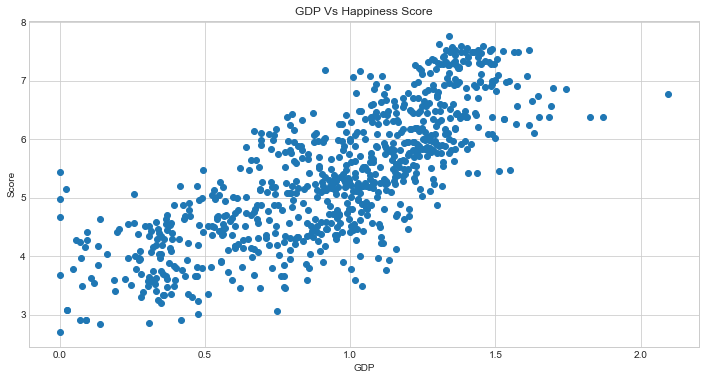

In [4]:
fig, ax = plt.subplots(figsize = (12, 6))
x = df['GDP']
y = df['Score']
plt.scatter(x, y)
plt.title('GDP Vs Happiness Score')
plt.xlabel('GDP')
plt.ylabel('Score')
plt.show()

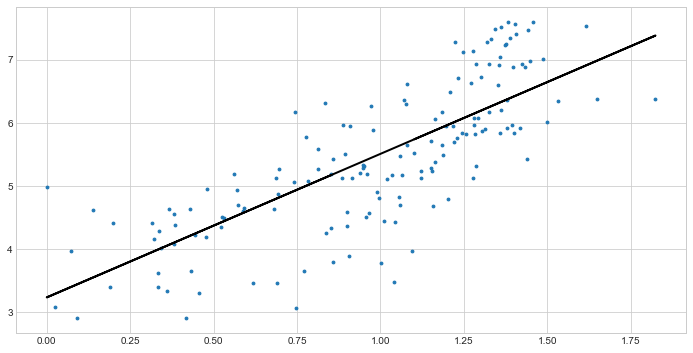

In [8]:
x = df['GDP'].values.reshape(-1, 1).astype('float32')
y = df['Score'].values.reshape(-1, 1).astype('float32')
#split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) #randomstate:biar hasilnya sama

#linear regression 
h = LinearRegression()
h.fit(X_train, y_train)

y_pred = h.predict(X_test)
#Draw Plot
fig, (ax1) = plt.subplots(1, figsize = (12, 6))
ax1.scatter(X_test, y_test, s = 8)
plt.plot(X_test, y_pred, color = 'black', linewidth = 2)
plt.show()


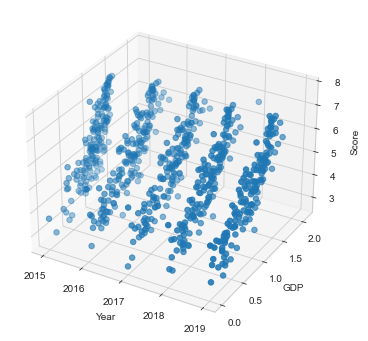

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['Year'], df['GDP'], df['Score'], s = 30)
ax.set(xlabel = 'Year', ylabel = 'GDP', zlabel = 'Score')
plt.xticks(np.arange(2015, 2020, step = 1))
plt.show()

### Load Dataset

In [12]:
df_19 = pd.read_csv('2019.csv - 2019.csv.csv')

### Data Understanding

In [13]:
df_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
df_19.columns = ['Rank', 'Country', 'Score', 'GDP', 'Support', 'Health', 'Freedom', 'Generosity', 'Corruption']
df_19.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [18]:
#Data Preprocessing
top_economies = ['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India', 'France', 'Brazil', 'Canada']
df_top = df_19[(df_19['Country'].isin(top_economies))].sort_values(['Country'])
df_top.reset_index(drop = True)

x = df_top.loc[:, ['Score']]
df_top['Score_z'] = (x - x.mean())/x.std()
df_top['colors'] = ['red' if x < 0 else 'blue' for x in df_top['Score_z']]
df_top.sort_values('Score_z', inplace = True)
df_top.reset_index(inplace = True)
df_top


,index,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Score_z,colors
0,139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,-2.098423,red
1,92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100,-0.991149,red
2,57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140,-0.336765,red
3,31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086,0.053041,blue
4,23,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183,0.327977,blue
5,18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,0.610445,blue
6,16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,0.698010,blue
7,14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,0.762977,blue
8,8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,0.973887,blue


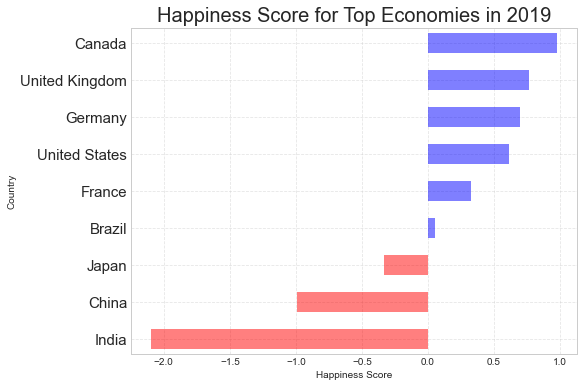

In [19]:
#Draw Plot
plt.figure(figsize = (8, 6))
plt.hlines(y = df_top.index, xmin = 0, xmax = df_top.Score_z, color = df_top.colors, alpha = 0.5, linewidth = 20)

#Decorations
plt.gca().set(ylabel = 'Country', xlabel = 'Happiness Score')
plt.yticks(df_top.index, df_top.Country, fontsize = 15)
plt.title('Happiness Score for Top Economies in 2019', fontdict = {'size':20})
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()

### Regular Area Chart

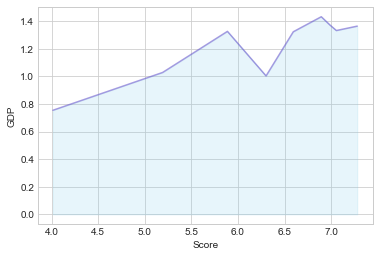

In [20]:
# Regular Area Chart
x = df_top['Score']
y = df_top['GDP']

#Change the color and its transparency
plt.fill_between(x, y, color = 'skyblue', alpha = 0.2)
plt.xlabel('Score')
plt.ylabel('GDP')
plt.plot(x, y, color = 'Slateblue', alpha = 0.6)

### Stacked area chart

In [ ]:
#stacked area chart
fig = plt.figure(figsize = (12, 8))
plt.stackplot(df_top.index, 
             [df_top['GDP'], df_top['Health'],
             df_top['Support'], df_top['Freedom']],
             df_top['Generosity'], df_top['Corruption'],
             labels = ['GDP', 'Health', 'Support', 'Freedom', 'Generosity', 'Corruption'],
             alpha = 0.8)
plt.legend(loc = 2, fontsize = 'large')
plt.show()


### 100% stacked area chart

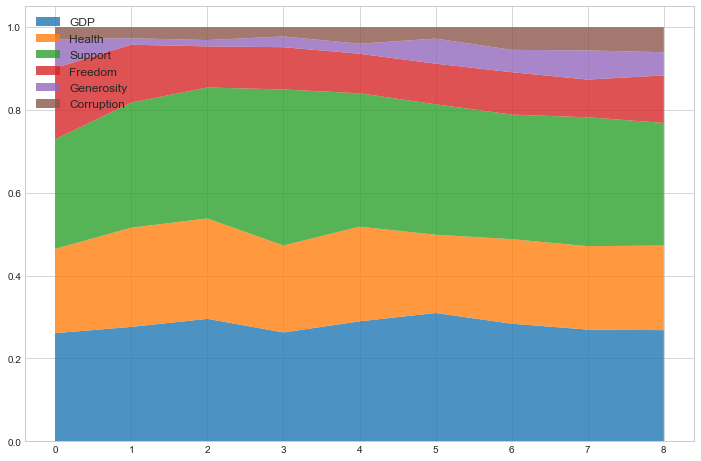

In [21]:
#100% stacked area chart
fig = plt.figure(figsize = (12, 8))
df_perc = df_top[['GDP', 'Health', 'Support', 'Freedom', 'Generosity', 'Corruption']]
df_perc = df_perc.divide(df_perc.sum(axis = 1), axis = 0)

plt.stackplot(df_perc.index, 
             [df_perc['GDP'], df_perc['Health'],
             df_perc['Support'], df_perc['Freedom']],
             df_perc['Generosity'], df_perc['Corruption'],
             labels = ['GDP', 'Health', 'Support', 'Freedom', 'Generosity', 'Corruption'],
             alpha = 0.8)

plt.legend(loc = 2, fontsize = 'large')
plt.show()

### Bar Chart

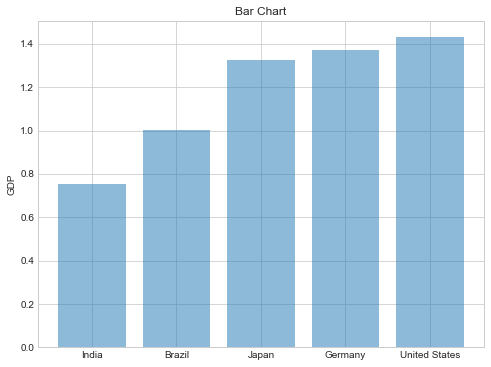

In [22]:
#Bar Chart
plt.figure(figsize = (8, 6))
countries = ['United States', 'Japan', 'Germany', 'Brazil', 'India']
y_pos = np.arange(len(countries))
data = df_19[(df_19['Country'].isin(countries))].sort_values(['Country'])
data.sort_values('GDP', inplace = True)
data.reset_index(drop = True)

plt.bar(y_pos, data['GDP'], align = 'center', alpha = 0.5)
plt.xticks(y_pos, data['Country'])
plt.ylabel('GDP')
plt.title('Bar Chart')
plt.show()

### Horizontal bar chart

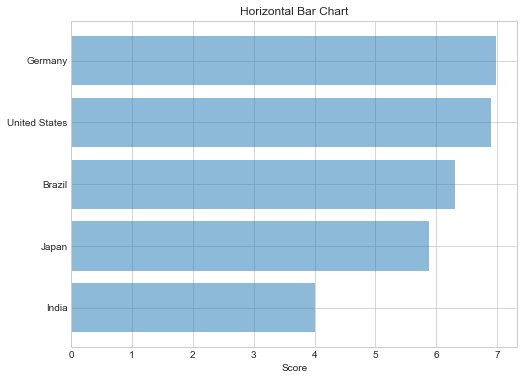

In [24]:
# horizontal bar chart
plt.figure(figsize = (8, 6))
data.sort_values('Score', inplace = True)
data.reset_index(drop = True)

plt.barh(y_pos, data['Score'], align = 'center', alpha = 0.5)
plt.yticks(y_pos, data['Country'])
plt.xlabel('Score')
plt.title('Horizontal Bar Chart')
plt.show()


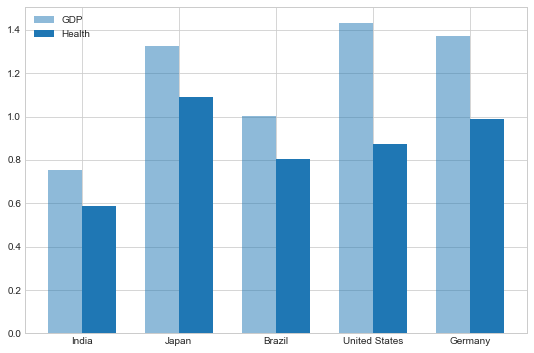

In [25]:
index = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize = (9, 6))
rects1 = ax.bar(index - width /2, data['GDP'], 
               width, color = '#1f77b4', alpha = 0.5)
rects2 = ax.bar(index + width / 2 , data['Health'],
               width, color = '#1f77b4')
plt.xticks(index, data['Country'])
plt.legend((rects1[0], rects2[0]), ('GDP', 'Health'))
plt.show()

### Stacked bar chart

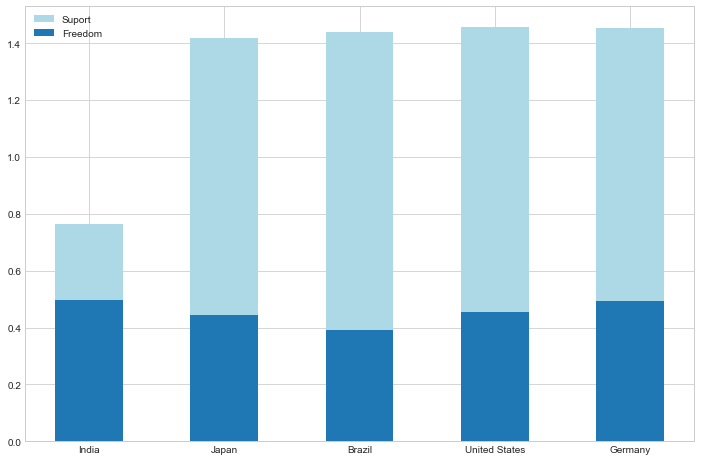

In [26]:
# stacked bar chart
fig = plt.figure(figsize=(12, 8))
rect1 = plt.bar(np.arange(5), data['Support'],
               width = 0.5, color = 'lightblue')
rect2 = plt.bar(np.arange(5), data['Freedom'],
               width = 0.5, color = '#1f77b4')
plt.xticks(index, data['Country'])
plt.legend((rect1[0], rect2[0]), ('Suport', 'Freedom'))
plt.show()

### Box plot

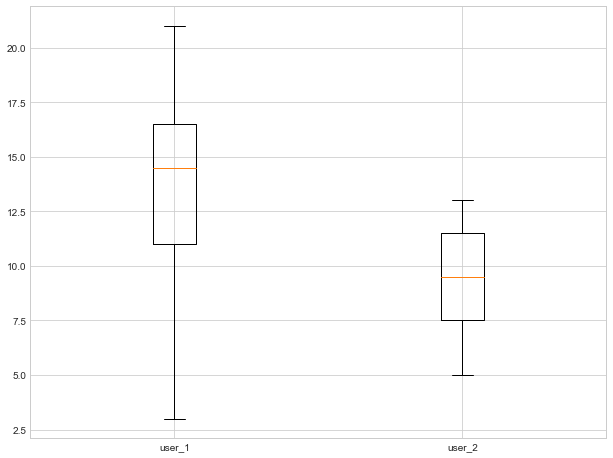

In [27]:
# Box plot
user_1 = [10, 3, 15, 21, 17, 14]
user_2 = [5, 13, 10, 7, 9, 12]
data =[user_1, user_2]
fig = plt.figure(figsize = (8, 6))

ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data)

plt.xticks([1, 2], ['user_1', 'user_2'])
plt.show()
